# Prediction of severity of road accidents using multiclass classification

## 1. Import required libraries 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## 2. Load data

In [2]:
# The code was removed by Watson Studio for sharing.

In [ ]:
df.columns

## 3. Data visualization and pre-processing

###  Remove unwanted columns from the dataframe


In [3]:
df.drop(['OBJECTID','INCKEY', 'COLDETKEY','INTKEY','LOCATION','EXCEPTRSNCODE', 'EXCEPTRSNDESC',
         'REPORTNO', 'STATUS', 'SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE',
         'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
        'CROSSWALKKEY'], axis=1, inplace=True)
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR'],
      dtype='object')

### Remove unknown severity accidents from the data. 

In [ ]:
# Let's look at the severity index
df['SEVERITYCODE'].value_counts()

In [4]:
# Let's remove the rows where severity code=0.
# Get names of indexes for which column severity code=0
indexNames = df[ df['SEVERITYCODE'] == '0' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

In [5]:
# Let's look at the severity index
df['SEVERITYCODE'].value_counts()

1     137596
2      58747
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

### Convert date and time string and extract day of week

In [6]:
df['INCDATE'] = pd.to_datetime(df['INCDATE']).dt.date
df['INCDTTM'] = pd.to_datetime(df['INCDTTM']).dt.time

In [7]:
df['INCDATE'] = df['INCDATE'].astype('datetime64[ns]')

In [8]:
df['dayofweek'] = df['INCDATE'].dt.dayofweek

### Check for NaN values

In [ ]:
# print number of missing values in each column 
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

In [9]:
# Now we drop the rows with NaNs to get the useful information
df.dropna(subset=['SEVERITYCODE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'X', 'Y'], axis=0, inplace=True)

### CONVERT COLUMNS WITH MIXED TYPE OF DATA IN TO 0 OR 1

In [10]:
# CONVERT COLUMNS WITH MIXED TYPE OF DATA IN TO 0 OR 1
#SPEEDING, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, HITPARKEDCAR
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

### Check each column to see the consistancy in reporting data.


In [11]:
# Let's combine 2 (injury) and 2b (serious injury) together and remove rows with 0 (unknown)
cleanup_SEVERITYCODE = {"SEVERITYCODE":     {"1": 1, "2": 2, "2b":3, "3": 4}}
df.replace(cleanup_SEVERITYCODE, inplace=True)

In [12]:
# Let's look at the severity index
df['SEVERITYCODE'].value_counts()

1    129437
2     56692
3      2995
4       331
Name: SEVERITYCODE, dtype: int64

In [ ]:
#df["SEVERITYCODE"]=df.SEVERITYCODE.astype(float)

In [ ]:
df.columns

In [13]:
df.drop(['index'], axis=1, inplace=True)

### Let's plot data and understand the distribution

Text(0.5, 1.0, 'SEVERITYCODE')

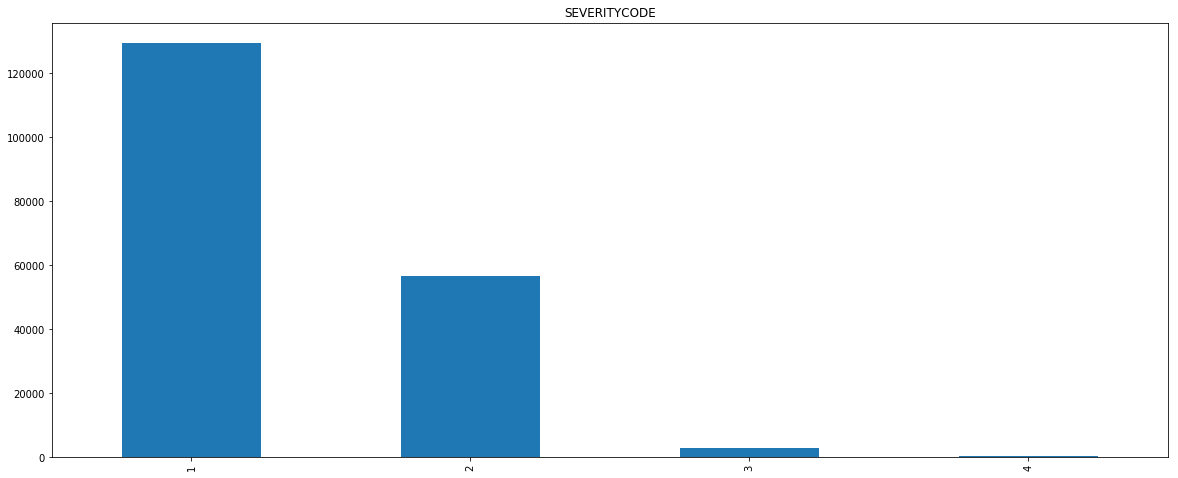

In [14]:
# Let's plot SEVERITY CODE
fig, ax = plt.subplots(1,1, figsize=(20, 8))
fig.subplots_adjust(hspace=2)
df['SEVERITYCODE'].value_counts().plot("bar").set_title('SEVERITYCODE')

Text(0.5, 1.0, 'ADDRTYPE')

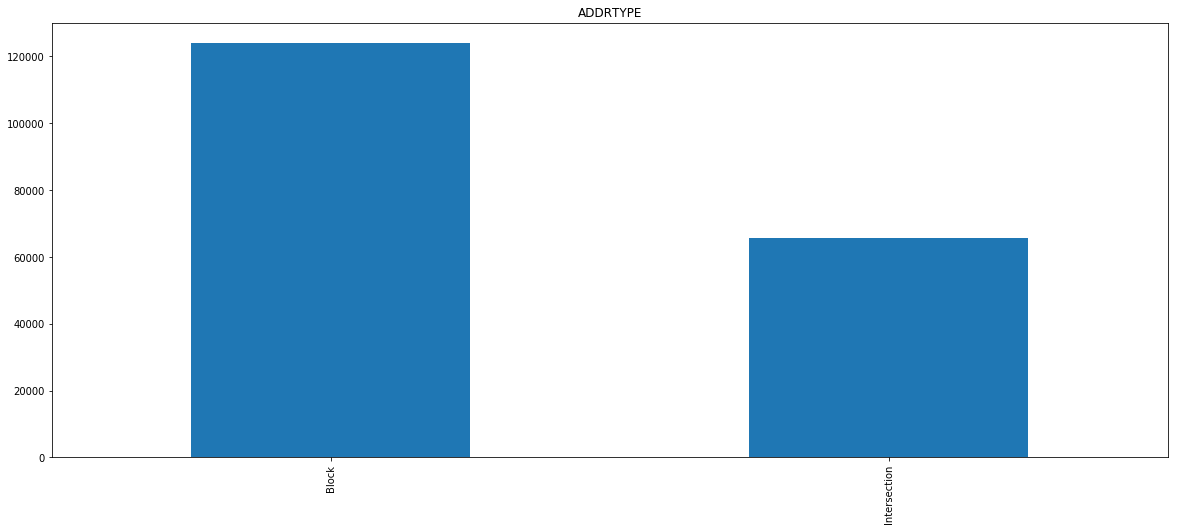

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
fig.subplots_adjust(hspace=2)
df['ADDRTYPE'].value_counts().plot("bar").set_title('ADDRTYPE')

Text(0.5, 1.0, 'SDOT_COLCODE')

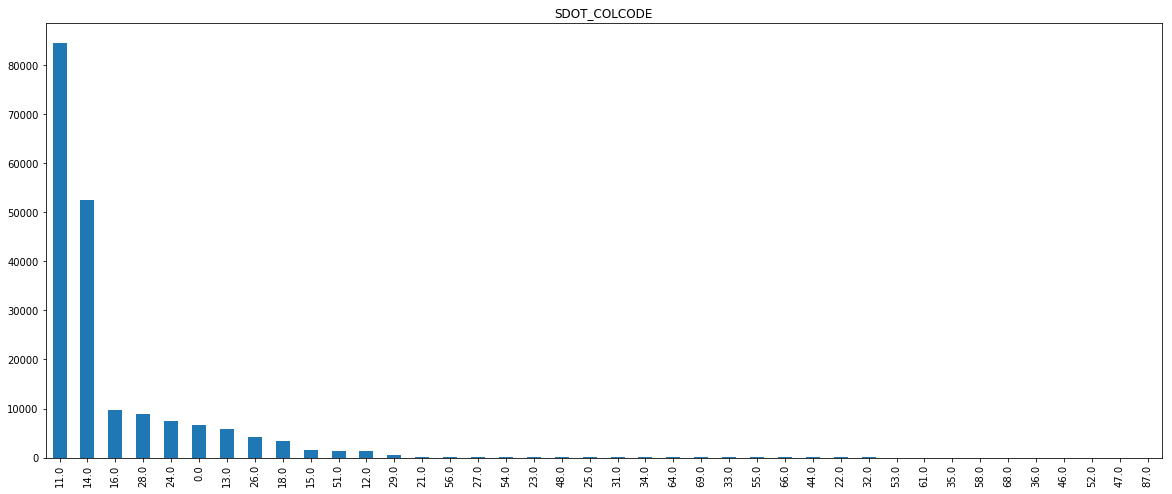

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
fig.subplots_adjust(hspace=2)
df['SDOT_COLCODE'].value_counts().plot("bar").set_title('SDOT_COLCODE')

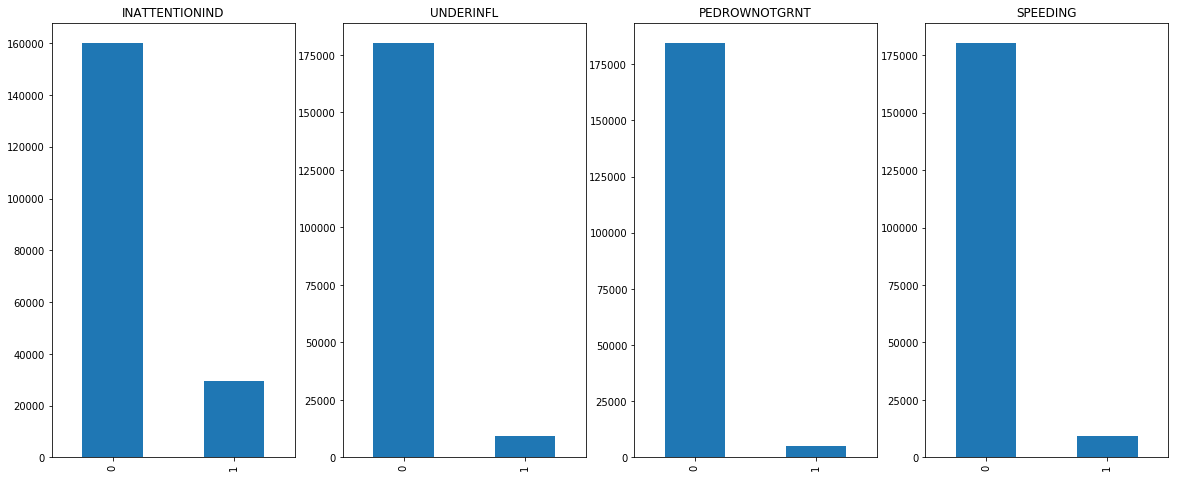

In [17]:
#categorical_features = ['SEVERITYCODE', 'ADDRTYPE', 'dayofweek', 'UNDERINFL']
categorical_features = ['INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING',]
fig, ax = plt.subplots(1,len(categorical_features), figsize=(20, 8))
fig.subplots_adjust(hspace=2)
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()
#sns.countplot(df['ADDRTYPE'])

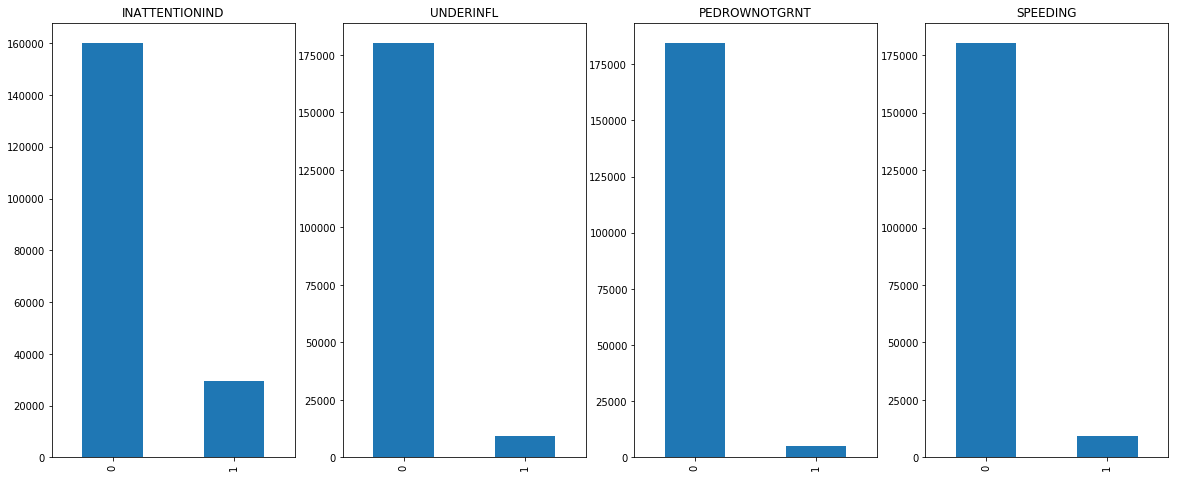

In [18]:
#categorical_features = ['SEVERITYCODE', 'ADDRTYPE', 'dayofweek', 'UNDERINFL']
categorical_features = ['INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING',]
fig, ax = plt.subplots(1,len(categorical_features), figsize=(20, 8))
fig.subplots_adjust(hspace=2)
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

### Feature before one hot encodeing

In [ ]:
#Check the dataframe for any NaNs
print(df.isnull().sum(axis=0))

In [ ]:
df['ADDRTYPE'].value_counts()

In [ ]:
df.columns

In [19]:
Feature=df[['X', 'Y', 'ADDRTYPE', 'SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING','dayofweek']]


In [20]:
# Let's do one hot encoding
# 1. ADDRTYPE
Feature=Feature[['X', 'Y', 'PERSONCOUNT','SEVERITYCODE', 'PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT',
        'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'WEATHER', 'ROADCOND', 'LIGHTCOND',  'SPEEDING',
       'SDOT_COLCODE','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
#Feature.head()

In [ ]:
df['LIGHTCOND'].value_counts()

In [ ]:
Feature.columns

In [21]:
# Let's do one hot encoding
# 1. LIGHTCOND
Feature=Feature[['X', 'Y', 'PERSONCOUNT', 'SEVERITYCODE','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'WEATHER', 'ROADCOND',
       'SPEEDING', 'SDOT_COLCODE', 'dayofweek', 'Block',
       'Intersection']]
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature.drop(['Unknown','Other'], axis = 1,inplace=True)
#Feature.head()

In [ ]:
df['WEATHER'].value_counts()

In [ ]:
Feature.columns

In [22]:
# Let's do one hot encoding
# 1. Weather
Feature=Feature[['X', 'Y', 'SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 
        'ROADCOND',
       'SPEEDING', 'SDOT_COLCODE', 'dayofweek', 'Block', 'Intersection',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk']]
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature.drop(['Unknown','Other'], axis = 1,inplace=True)
#Feature.head()

In [ ]:
df['ROADCOND'].value_counts()

In [ ]:
Feature.columns

In [23]:
# Let's do one hot encoding
# 1. Weather
Feature = Feature[['X', 'Y', 'SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'SDOT_COLCODE', 'dayofweek', 'Block', 'Intersection',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing']]
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature.drop(['Unknown','Other', ], axis = 1,inplace=True)
Feature.head()

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,-122.320757,47.609408,1,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-122.319561,47.662221,1,2,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-122.374194,47.564076,1,2,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-122.290734,47.709276,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-122.336565,47.590398,1,2,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Feature.columns

In [24]:
Feature=Feature[['X', 'Y', 'SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'dayofweek', 'Block', 'Intersection',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet']]
Feature = pd.concat([Feature,pd.get_dummies(df['SDOT_COLCODE'])], axis=1)

In [ ]:
Feature.dtypes

In [25]:
df_all=Feature

In [26]:
df.shape

(189455, 23)

In [27]:
df_all.shape

(189455, 77)

In [28]:
df_all.dtypes

X                           float64
Y                           float64
SEVERITYCODE                  int64
PERSONCOUNT                   int64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
VEHCOUNT                      int64
INATTENTIONIND                int64
UNDERINFL                     int64
PEDROWNOTGRNT                 int64
SPEEDING                      int64
dayofweek                     int64
Block                         uint8
Intersection                  uint8
Dark - No Street Lights       uint8
Dark - Street Lights Off      uint8
Dark - Street Lights On       uint8
Dark - Unknown Lighting       uint8
Dawn                          uint8
Daylight                      uint8
Dusk                          uint8
Blowing Sand/Dirt             uint8
Clear                         uint8
Fog/Smog/Smoke                uint8
Overcast                      uint8
Partly Cloudy                 uint8
Raining                       uint8
Severe Crosswind            

### Balancing data

In [29]:
#from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Let's make a copy of original dataframe for resampling
df_Bal = df_all.copy()

# Let's shuffle the data set for balancing
shuffled_data = df_Bal.sample(frac=1, random_state=4)

# Now we create separate dataframes for each SEVERITYCODE
code1 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1]
code2 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2]
code3 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 3]
code4 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 4]

In [30]:
code2.shape

(56692, 77)

In [31]:
#Down-sample severity codes 1, 2 to match number of accidents in code 3
code1_new = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1].sample(n=len(code4), random_state=42)
code2_new = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2].sample(n=len(code4), random_state=42)
code3_new = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 3].sample(n=len(code4), random_state=42)
code4_new = code4

#Merge the dataframes
new_df = pd.concat([code1_new, code2_new, code3_new, code4_new])

#remove all the columns with only zeros. This is due to resampling and perhaps due to rare condition such as very low frequent events.
badcolumns = new_df.columns[new_df.nunique() <= 1]

#Remove those columns from the new dataframe
for i in badcolumns:
    if i in new_df:
        del new_df[i]
        
print(new_df.shape)
new_df.head()

(1324, 56)


,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,27.0,28.0,29.0,31.0,34.0,44.0,51.0,54.0,56.0,64.0
85461,-122.311930,47.675783,1,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85489,-122.306984,47.606166,1,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99129,-122.388862,47.673834,1,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102701,-122.316873,47.601273,1,4,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32640,-122.323082,47.620464,1,3,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Let's look at the severity index
new_df['SEVERITYCODE'].value_counts()

4    331
3    331
2    331
1    331
Name: SEVERITYCODE, dtype: int64

In [33]:
new_df.columns

Index([                       'X',                        'Y',
                   'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                'dayofweek',
                          'Block',             'Intersection',
        'Dark - No Street Lights', 'Dark - Street Lights Off',
        'Dark - Street Lights On',  'Dark - Unknown Lighting',
                           'Dawn',                 'Daylight',
                           'Dusk',                    'Clear',
                 'Fog/Smog/Smoke',                 'Overcast',
                  'Partly Cloudy',                  'Raining',
               'Severe Crosswind', 'Sleet/Hail/Freezing Rain',
                        'Snowing',                      'Dry',
                            'Ice',               'Snow/

Text(0.5, 1.0, 'SEVERITYCODE')

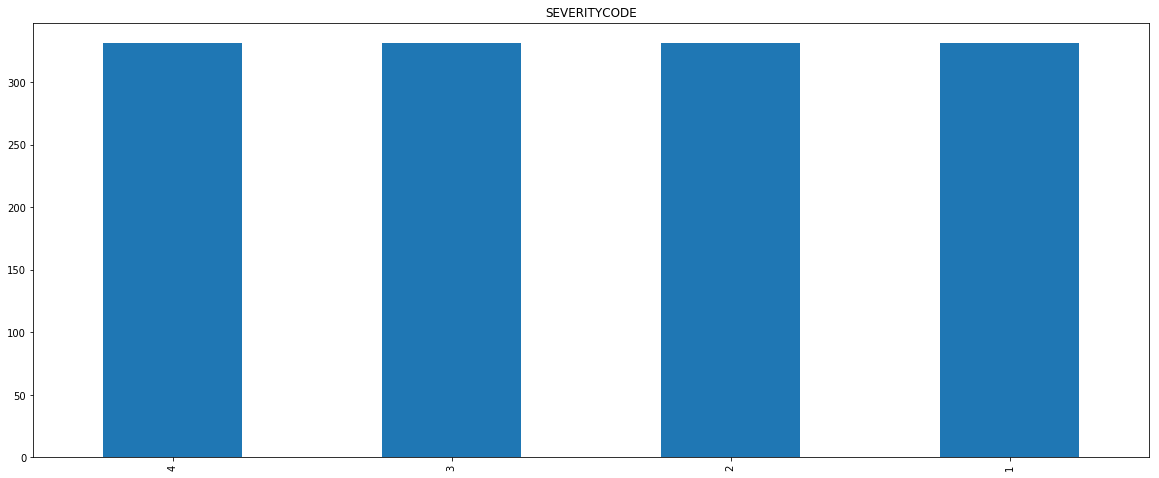

In [34]:
# Let's plot SEVERITY CODE
fig, ax = plt.subplots(1,1, figsize=(20, 8))
fig.subplots_adjust(hspace=2)
new_df['SEVERITYCODE'].value_counts().plot("bar").set_title('SEVERITYCODE')

In [35]:
new_df.columns

Index([                       'X',                        'Y',
                   'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                'dayofweek',
                          'Block',             'Intersection',
        'Dark - No Street Lights', 'Dark - Street Lights Off',
        'Dark - Street Lights On',  'Dark - Unknown Lighting',
                           'Dawn',                 'Daylight',
                           'Dusk',                    'Clear',
                 'Fog/Smog/Smoke',                 'Overcast',
                  'Partly Cloudy',                  'Raining',
               'Severe Crosswind', 'Sleet/Hail/Freezing Rain',
                        'Snowing',                      'Dry',
                            'Ice',               'Snow/

## Feature Selection

Let's define X and Y for modelling. Let's use the resampled data.

In [36]:
Feature=new_df[[                       'X',                        'Y',
                                 'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                'dayofweek',
                          'Block',             'Intersection',
        'Dark - No Street Lights', 'Dark - Street Lights Off',
        'Dark - Street Lights On',  'Dark - Unknown Lighting',
                           'Dawn',                 'Daylight',
                           'Dusk',                    'Clear',
                 'Fog/Smog/Smoke',                 'Overcast',
                  'Partly Cloudy',                  'Raining',
               'Severe Crosswind', 'Sleet/Hail/Freezing Rain',
                        'Snowing',                      'Dry',
                            'Ice',               'Snow/Slush',
                            'Wet',                        0.0,
                             11.0,                       12.0,
                             13.0,                       14.0,
                             15.0,                       16.0,
                             18.0,                       21.0,
                             23.0,                       24.0,
                             25.0,                       26.0,
                             27.0,                       28.0,
                             29.0,                       31.0,
                             34.0,                       44.0,
                             51.0,                       54.0,
                             56.0,                       64.0]]

In [37]:
X = Feature
X[0:5]

,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,27.0,28.0,29.0,31.0,34.0,44.0,51.0,54.0,56.0,64.0
85461,-122.311930,47.675783,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85489,-122.306984,47.606166,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99129,-122.388862,47.673834,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102701,-122.316873,47.601273,4,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32640,-122.323082,47.620464,3,0,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.columns

In [38]:
y = new_df['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [39]:
y.shape

(1324,)

In [40]:
new_df.dtypes

X                           float64
Y                           float64
SEVERITYCODE                  int64
PERSONCOUNT                   int64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
VEHCOUNT                      int64
INATTENTIONIND                int64
UNDERINFL                     int64
PEDROWNOTGRNT                 int64
SPEEDING                      int64
dayofweek                     int64
Block                         uint8
Intersection                  uint8
Dark - No Street Lights       uint8
Dark - Street Lights Off      uint8
Dark - Street Lights On       uint8
Dark - Unknown Lighting       uint8
Dawn                          uint8
Daylight                      uint8
Dusk                          uint8
Clear                         uint8
Fog/Smog/Smoke                uint8
Overcast                      uint8
Partly Cloudy                 uint8
Raining                       uint8
Severe Crosswind              uint8
Sleet/Hail/Freezing Rain    

In [41]:
# Now we perfor the same analysis as above for the balanced data set.
new_df.columns


Index([                       'X',                        'Y',
                   'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                'dayofweek',
                          'Block',             'Intersection',
        'Dark - No Street Lights', 'Dark - Street Lights Off',
        'Dark - Street Lights On',  'Dark - Unknown Lighting',
                           'Dawn',                 'Daylight',
                           'Dusk',                    'Clear',
                 'Fog/Smog/Smoke',                 'Overcast',
                  'Partly Cloudy',                  'Raining',
               'Severe Crosswind', 'Sleet/Hail/Freezing Rain',
                        'Snowing',                      'Dry',
                            'Ice',               'Snow/

## Normalize Data

Data Standardization give data zero mean and unit variance

In [42]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.58741209,  0.99612419, -0.23011161, -0.48164625, -0.25724532,
         0.27073123, -0.35204954, -0.3786167 , -0.31280044, -0.3889786 ,
         1.03030331, -1.13956619,  1.13956619, -0.07796812, -0.11404774,
         1.44938007, -0.02749287, -0.13296131, -1.17710899, -0.18757329,
         0.79154003, -0.08272911, -0.43294797, -0.02749287, -0.47770322,
        -0.02749287, -0.02749287, -0.02749287,  0.65795169, -0.03889549,
        -0.03889549, -0.61226644, -0.14964566, -0.74553114, -0.02749287,
        -0.13296131,  2.10386062, -0.04765508, -0.16478116, -0.18540496,
        -0.05504819, -0.03889549, -0.48603274, -0.02749287, -0.19184632,
        -0.02749287, -0.31858673, -0.08272911, -0.02749287, -0.02749287,
        -0.03889549, -0.11739907, -0.03889549, -0.06747112, -0.04765508],
       [ 0.74852221, -0.21495302, -0.23011161, -0.48164625, -0.25724532,
         0.27073123, -0.35204954, -0.3786167 , -0.31280044, -0.3889786 ,
        -1.54935173,  0.87752691, -0.87752691, -0.

## Classification

## K Nearest Neighbor  

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

In [46]:
# Let's split data into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1059, 55) (1059,)
Test set: (265, 55) (265,)


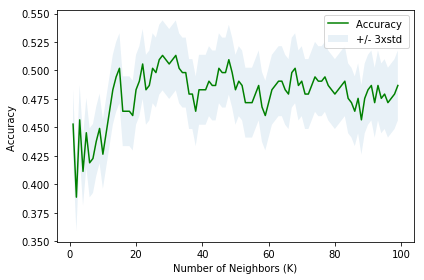

The best accuracy was with 0.5132075471698113 with k= 28


In [47]:
# Lte's find the best k value that gives the highest accuracy
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


In [50]:
# Let's try the KNN model again with the best k=7
k = 28
#Train Model and Predict  
collision_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = collision_KNN.predict(X_test)

In [54]:
# Let's calculate the train and test set accuracies 

print("KNN's Train set Accuracy: ", metrics.accuracy_score(y_train, collision_KNN.predict(X_train)))
print("KNN's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))

print("KNN's Jaccard score:", jaccard_similarity_score(y_test, yhat_KNN))
J_KNN = jaccard_similarity_score(y_test, yhat_KNN)

print("F1-score:", f1_score(y_test, yhat_KNN, average='weighted'))
F1_KNN = f1_score(y_test, yhat_KNN, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=[1,2, 3, 4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_KNN))

KNN's Train set Accuracy:  0.4796978281397545
KNN's Test set Accuracy:  0.5132075471698113
KNN's Jaccard score: 0.5132075471698113
F1-score: 0.5072338776019854
              precision    recall  f1-score   support

           1       0.51      0.62      0.56        72
           2       0.45      0.51      0.48        65
           3       0.44      0.29      0.35        55
           4       0.62      0.58      0.60        73

   micro avg       0.51      0.51      0.51       265
   macro avg       0.51      0.50      0.50       265
weighted avg       0.51      0.51      0.51       265



Confusion matrix, without normalization
[[45 20  1  6]
 [16 33  7  9]
 [13 15 16 11]
 [14  5 12 42]]


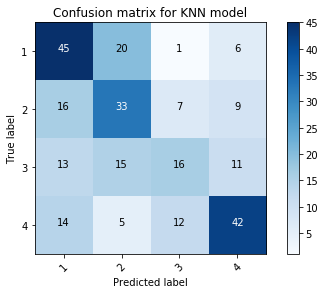

In [55]:
import itertools
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix for KNN model')
#plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')

## Decision Tree

In [56]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [57]:
# prediction using descision tree model
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
collisionTree.fit(X_train,y_train)
predTree = collisionTree.predict(X_test)

DecisionTrees's Train set Accuracy:  0.5646836638338055
DecisionTrees's Test set Accuracy:  0.4377358490566038
DecisionTrees's Jaccard score: 0.4377358490566038
DecisionTrees's F1-score: 0.43130748121568074
              precision    recall  f1-score   support

           1       0.55      0.46      0.50        72
           2       0.36      0.40      0.38        65
           3       0.26      0.20      0.22        55
           4       0.52      0.63      0.57        73

   micro avg       0.44      0.44      0.44       265
   macro avg       0.42      0.42      0.42       265
weighted avg       0.43      0.44      0.43       265

Confusion matrix, without normalization
[[33 24  6  9]
 [15 26 12 12]
 [ 8 14 11 22]
 [ 4  9 14 46]]


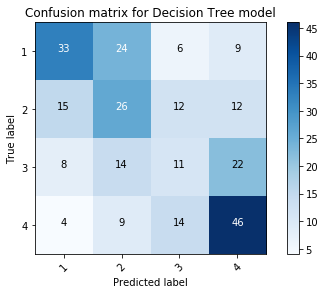

In [67]:
# Evaluation of the accuracy of training and test data
print("DecisionTrees's Train set Accuracy: ", metrics.accuracy_score(y_train, collisionTree.predict(X_train)))
print("DecisionTrees's Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

print("DecisionTrees's Jaccard score:", jaccard_similarity_score(y_test, predTree))
J_tree = jaccard_similarity_score(y_test, predTree)

print("DecisionTrees's F1-score:", f1_score(y_test, predTree, average='weighted'))
F1_tree = f1_score(y_test, predTree, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix for Decision Tree model')
#plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')

In [ ]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [ ]:
X.columns

In [ ]:
#import pydotplus
#dot_data = StringIO()
#filename = "collisiontree.png"
#featureNames = X.columns[:]
#targetNames = df['SEVERITYCODE'].unique().tolist()
#out=tree.export_graphviz(collisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

## Support Vector Machine

In [69]:
from sklearn import svm

In [71]:
collision_SVM = svm.SVC(decision_function_shape='ovo')
collision_SVM.fit(X_train, y_train) 
yhat_SVM = collision_SVM.predict(X_test)
yhat_SVM[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([2, 3, 4, 4, 2])

In [72]:
# Evaluation of the accuracy of training and test data
print("SVM's Train set Accuracy: ", metrics.accuracy_score(y_train, collision_SVM.predict(X_train)))
print("SVM's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))

print("SVM's Jaccard score:", jaccard_similarity_score(y_test, yhat_SVM))
J_SVM=jaccard_similarity_score(y_test, yhat_SVM)

print("SVM's F1-score:", f1_score(y_test, yhat_SVM, average='weighted'))
F1_SVM= f1_score(y_test, yhat_SVM, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[1,2,3, 4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_SVM))

SVM's Train set Accuracy:  0.5741265344664778
SVM's Test set Accuracy:  0.5207547169811321
SVM's Jaccard score: 0.5207547169811321
SVM's F1-score: 0.5191086142568622
              precision    recall  f1-score   support

           1       0.57      0.57      0.57        72
           2       0.44      0.48      0.46        65
           3       0.37      0.33      0.35        55
           4       0.65      0.66      0.65        73

   micro avg       0.52      0.52      0.52       265
   macro avg       0.51      0.51      0.51       265
weighted avg       0.52      0.52      0.52       265



Confusion matrix, without normalization
[[41 21  6  4]
 [15 31 10  9]
 [11 13 18 13]
 [ 5  5 15 48]]


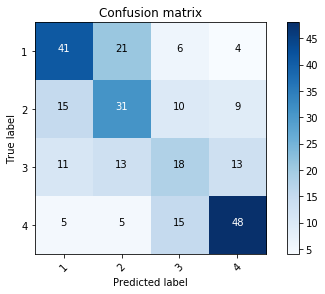

In [73]:


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [79]:
collision_LR = LogisticRegression(C=0.01, solver='lbfgs', multi_class='ovr').fit(X_train,y_train)
yhat_LR = collision_LR.predict(X_test)
yhat_prob_LR = collision_LR.predict_proba(X_test)

LogisticRegression's Train set Accuracy:  0.5089707271010387
LogisticRegression's Test set Accuracy:  0.5169811320754717
LogisticRegression's Jaccard score: 0.5169811320754717
LogisticRegression's F1-score: 0.5035091280651768
LogisticRegression's LogLoss: 1.1479807692738078
              precision    recall  f1-score   support

           1       0.56      0.58      0.57        72
           2       0.44      0.54      0.49        65
           3       0.37      0.20      0.26        55
           4       0.60      0.67      0.64        73

   micro avg       0.52      0.52      0.52       265
   macro avg       0.49      0.50      0.49       265
weighted avg       0.50      0.52      0.50       265

Confusion matrix, without normalization
[[42 22  1  7]
 [13 35  7 10]
 [13 16 11 15]
 [ 7  6 11 49]]


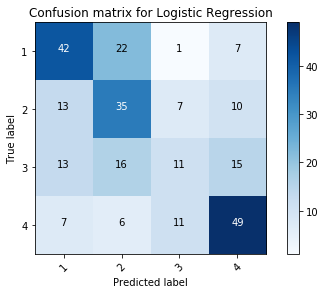

In [81]:
# Evaluation of the accuracy of training and test data
print("LogisticRegression's Train set Accuracy: ", metrics.accuracy_score(y_train, collision_LR.predict(X_train)))
print("LogisticRegression's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

print("LogisticRegression's Jaccard score:", jaccard_similarity_score(y_test, yhat_LR))
J_LR=jaccard_similarity_score(y_test, yhat_LR )

print("LogisticRegression's F1-score:", f1_score(y_test, yhat_LR, average='weighted'))
F1_LR=f1_score(y_test, yhat_LR, average='weighted')

print("LogisticRegression's LogLoss:", log_loss(y_test, yhat_prob_LR))
LL=log_loss(y_test, yhat_prob_LR)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_LR))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  classes=[1,2,3,4],normalize= False,  title='Confusion matrix for Logistic Regression')

## Concluding remarks

In [82]:
Algorithm=["KNN","Decision Tree", "SVM", "LogisticRegression"]
Jaccard=[J_KNN, J_tree, J_SVM, J_LR]
F1_score=[F1_KNN, F1_tree, F1_SVM, F1_LR]
LogLoss= ["NA", "NA", "NA", LL]
acc=pd.DataFrame({'Algorithm':Algorithm[:],'Jaccard': Jaccard[:], 'F1-score': F1_score[:], 'LogLoss': LogLoss[:] })
acc.set_index('Algorithm')

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.513208,0.507234,NA
Decision Tree,0.437736,0.431307,NA
SVM,0.520755,0.519109,NA
LogisticRegression,0.516981,0.503509,1.14798
